In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [4]:
DIRECTORY = r'/content/drive/MyDrive/Miczone/fingerprint/data/test'
CATEGORIES =  ['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"]
IMG_SIZE = 128

In [18]:
X_train = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/X_train.pkl','rb'))
Y_train = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/Y_train.pkl','rb'))
X_test = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/X_test.pkl','rb'))
Y_test = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/Y_test.pkl','rb'))
X_val = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/X_val.pkl','rb'))
Y_val = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/Y_val.pkl','rb'))

In [19]:
X_train = X_train.astype("float") / 255.0
X_val = X_val.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

In [20]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [21]:
Y_train = keras.utils.np_utils.to_categorical(Y_train)
Y_val = keras.utils.np_utils.to_categorical(Y_val)

In [23]:
IMG_SIZE = 128

In [24]:
model = Sequential()
width = 128
height = 128
classes = 7

In [25]:
shape = (width, height, 1)

In [26]:
model.add(Conv2D(16, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
activation_11 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)       

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
history = model.fit(X_train, Y_train, epochs=30, validation_data =(X_val,Y_val),batch_size=32,verbose = 1,use_multiprocessing=True)

Epoch 1/30
792/792 [==============================] - 17s 20ms/step - loss: 1.6447 - accuracy: 0.4151 - val_loss: 1.4603 - val_accuracy: 0.4505
Epoch 2/30
792/792 [==============================] - 15s 20ms/step - loss: 1.2798 - accuracy: 0.5185 - val_loss: 1.3026 - val_accuracy: 0.5140
Epoch 3/30
792/792 [==============================] - 15s 20ms/step - loss: 1.1184 - accuracy: 0.5814 - val_loss: 1.2335 - val_accuracy: 0.5483
Epoch 4/30
792/792 [==============================] - 15s 20ms/step - loss: 1.0039 - accuracy: 0.6191 - val_loss: 1.0140 - val_accuracy: 0.6350
Epoch 5/30
792/792 [==============================] - 15s 20ms/step - loss: 0.9281 - accuracy: 0.6490 - val_loss: 0.9850 - val_accuracy: 0.6234
Epoch 6/30
792/792 [==============================] - 15s 20ms/step - loss: 0.8610 - accuracy: 0.6654 - val_loss: 0.8216 - val_accuracy: 0.6971
Epoch 7/30
792/792 [==============================] - 15s 20ms/step - loss: 0.8092 - accuracy: 0.6887 - val_loss: 0.7966 - val_accuracy:

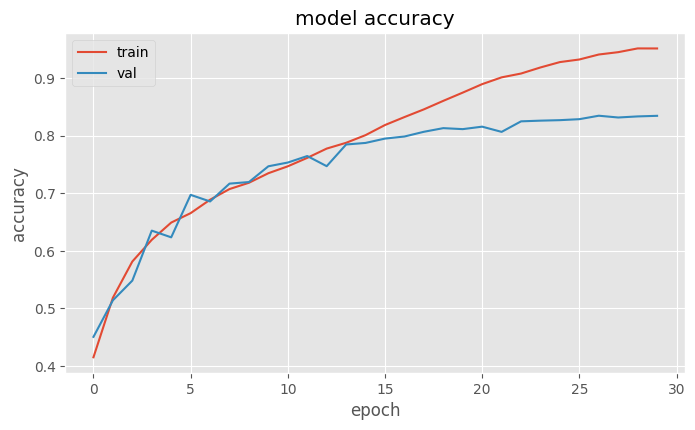

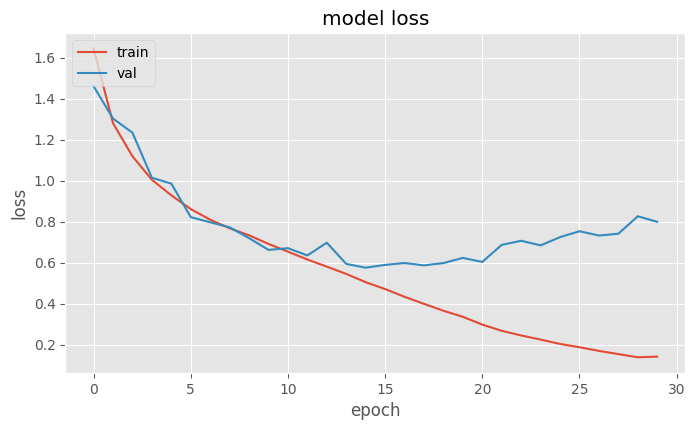

In [61]:
plt.figure(figsize = (8,4.5),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (8,4.5),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
pred = model.predict(X_test)
pred_idx = np.argmax(pred, axis=1)

In [43]:
print(classification_report(Y_test, pred_idx))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       695
           1       0.90      0.68      0.78       129
           2       0.94      0.97      0.95      3582
           3       0.71      0.64      0.67      1297
           4       0.67      0.72      0.70      1316
           5       0.76      0.45      0.56        76
           6       0.60      0.59      0.60       700

    accuracy                           0.83      7795
   macro avg       0.79      0.71      0.74      7795
weighted avg       0.82      0.83      0.82      7795



In [47]:
cm = confusion_matrix(Y_test,pred_idx)

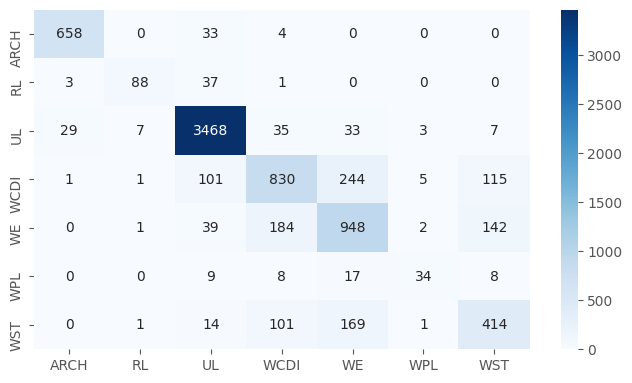

In [59]:
df_cm = pd.DataFrame(cm, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='d')
plt.show()

In [62]:
model.save("/content/drive/MyDrive/Miczone/fingerprint/model_v1.h5")